In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
import glob

folder_path = './db/all/'
file_extension = '.csv'

file_paths = glob.glob(os.path.join(folder_path, f'*{file_extension}'))
file_paths = sorted(file_paths, reverse=True)
print(file_paths)

['./db/all/2022-^FCHI.csv', './db/all/2022-XFAB.PA.csv', './db/all/2022-WLN.PA.csv', './db/all/2022-WAVE.PA.csv', './db/all/2022-VRLA.PA.csv', './db/all/2022-VMX.PA.csv', './db/all/2022-VLTSA.PA.csv', './db/all/2022-VLA.PA.csv', './db/all/2022-VK.PA.csv', './db/all/2022-VIV.PA.csv', './db/all/2022-VIRP.PA.csv', './db/all/2022-VIE.PA.csv', './db/all/2022-VETO.PA.csv', './db/all/2022-VCT.PA.csv', './db/all/2022-VAC.PA.csv', './db/all/2022-URW.AS.csv', './db/all/2022-UCG.MI.csv', './db/all/2022-UBI.PA.csv', './db/all/2022-TTE.PA.csv', './db/all/2022-TRI.PA.csv', './db/all/2022-TNG.PA.csv', './db/all/2022-TKTT.PA.csv', './db/all/2022-TKO.PA.csv', './db/all/2022-TIT.MI.csv', './db/all/2022-TIS.MI.csv', './db/all/2022-TFI.PA.csv', './db/all/2022-TEP.PA.csv', './db/all/2022-SW.PA.csv', './db/all/2022-SU.PA.csv', './db/all/2022-STM.PA.csv', './db/all/2022-STF.PA.csv', './db/all/2022-SRS.MI.csv', './db/all/2022-SRP.PA.csv', './db/all/2022-SRG.MI.csv', './db/all/2022-SPM.MI.csv', './db/all/2022-

In [3]:
days_in_year = 252
data_list = []
tickers_list = []

for file_path in file_paths:
    ticker_year_df = pd.read_csv(file_path)
    ticker_year_df = ticker_year_df['Close']

    daily_profit_df = ticker_year_df.pct_change()
    daily_profit_df = daily_profit_df.dropna()
    daily_profit_df.head()

    profit = daily_profit_df.mean() * days_in_year * 100
    volatility = daily_profit_df.std() * days_in_year

    file_name = file_path.replace(folder_path, '')
    year = file_name[0:4]
    ticker = file_name[5:].replace(file_extension, '')
    index = f'{ticker}-{year}'

    data_list.append({'index': index, 'year': year, 'ticker': ticker,
                      'profit': profit, 'volatility': volatility})
    
    tickers_list.append(ticker)

df = pd.DataFrame(data_list)

In [4]:
df = df.dropna()
df = df.sort_values(by=['index'])
df['previous_profit'] = df['profit'].shift(periods=1)
df['profit_ratio'] = df['profit'] / df['previous_profit']

min_years = df.groupby('ticker')['year'].transform('min')
df = df[df['year'] != min_years]

print(df.to_markdown())

|      | index         |   year | ticker   |       profit |   volatility |   previous_profit |    profit_ratio |
|-----:|:--------------|-------:|:---------|-------------:|-------------:|------------------:|----------------:|
| 4662 | A2A.MI-2001   |   2001 | A2A.MI   |  -21.2645    |     6.13377  |        -2.05771   |    10.3341      |
| 4450 | A2A.MI-2002   |   2002 | A2A.MI   |  -50.8071    |     5.58549  |       -21.2645    |     2.38929     |
| 4238 | A2A.MI-2003   |   2003 | A2A.MI   |   15.1851    |     4.0363   |       -50.8071    |    -0.298877    |
| 4026 | A2A.MI-2004   |   2004 | A2A.MI   |   13.9659    |     2.89949  |        15.1851    |     0.919715    |
| 3814 | A2A.MI-2005   |   2005 | A2A.MI   |   -5.54124   |     3.21354  |        13.9659    |    -0.396769    |
| 3602 | A2A.MI-2006   |   2006 | A2A.MI   |   44.13      |     3.08269  |        -5.54124   |    -7.96392     |
| 3390 | A2A.MI-2007   |   2007 | A2A.MI   |   24.2765    |     3.42943  |        44.13      |  

In [5]:
df = df.sort_values(by=['previous_profit'], ascending=False)
print(df.to_markdown())

|      | index         |   year | ticker   |       profit |   volatility |   previous_profit |    profit_ratio |
|-----:|:--------------|-------:|:---------|-------------:|-------------:|------------------:|----------------:|
| 4605 | DBG.PA-2001   |   2001 | DBG.PA   |  -36.8452    |     9.23449  |       934.579     |    -0.0394244   |
| 4297 | RF.PA-2002    |   2002 | RF.PA    |  -13.7071    |     5.57135  |       784.166     |    -0.0174798   |
| 3395 | WAVE.PA-2006  |   2006 | WAVE.PA  |  -51.1785    |    12.6786   |       701.816     |    -0.072923    |
| 3442 | S30.PA-2006   |   2006 | S30.PA   |  137.503     |     9.63462  |       654.609     |     0.210053    |
| 2647 | JCQ.PA-2010   |   2010 | JCQ.PA   |  177.84      |    46.7929   |       351.975     |     0.505264    |
| 1030 | AVT.PA-2018   |   2018 | AVT.PA   |   -5.7464    |    14.8376   |       319.459     |    -0.0179879   |
| 3607 | WAVE.PA-2005  |   2005 | WAVE.PA  |  701.816     |    83.9032   |       312.164     |  

Buying last year's big profit values

In [6]:
threshold_pct = 60
big_profit_df = df.drop(df[df['previous_profit'] < threshold_pct].index)
big_profit_df = big_profit_df.sort_values(by=['year'])

print(f'number of values: {len(big_profit_df)} i.e. {len(big_profit_df)/22}/yr')
print(f'mean: {big_profit_df["profit"].mean()}')
print(f'median: {big_profit_df["profit"].median()}')
print(f'std dev: {big_profit_df["profit"].std()}')

print(big_profit_df.groupby('year')['profit'].agg(['mean', 'median']))

number of values: 250 i.e. 11.363636363636363/yr
mean: 17.48111012631923
median: 11.53103806533105
std dev: 74.72675229278056
           mean     median
year                      
2001  -4.238198  -6.160303
2002 -40.712349 -31.285201
2004  69.655059  25.545440
2005  97.114972  39.822625
2006  50.718710  44.675019
2007 -12.928517  -3.660304
2008 -70.616189 -67.203897
2010  28.175798  31.862026
2011 -14.209795  -7.885034
2012 -18.637089 -18.637089
2013  33.978996  29.561714
2014  12.128124  13.603988
2015  40.194293  40.337376
2016  18.158152  13.161848
2017  75.841073  44.367445
2018 -18.905271 -30.390613
2020  17.414848  18.312685
2021  13.293096  -0.738816
2022 -22.838035 -13.794517


Buying last year's top n values

In [7]:
top_n = 12
top_n_profit_df = df.groupby('year').apply(lambda x: x.nlargest(top_n, 'previous_profit')).reset_index(drop=True)

print(f'mean: {top_n_profit_df["profit"].mean()}')
print(f'median: {top_n_profit_df["profit"].median()}')
print(f'std dev: {top_n_profit_df["profit"].std()}')

print(top_n_profit_df.groupby('year')['profit'].agg(['mean', 'median']))

mean: 18.504943178511873
median: 10.845830183985374
std dev: 73.37131064397258
           mean     median
year                      
2001  -3.780730  -7.268076
2002 -28.219009 -10.155987
2003  28.788425  15.706204
2004  77.557489  40.908280
2005  92.061815  44.321726
2006  53.895435  49.363660
2007 -12.928517  -3.660304
2008 -58.524041 -64.427095
2009  13.189013   9.745995
2010  43.599274  37.223341
2011 -13.961936  -7.885034
2012  21.790961  27.963533
2013  35.695665  29.561714
2014  10.563298  14.156092
2015  34.995063  40.337376
2016  14.771959  11.294886
2017  68.490740  44.367445
2018 -14.327201 -19.347152
2019  19.703874  27.819588
2020  32.587290  27.149697
2021  21.364945   0.271503
2022 -30.205063 -16.633163


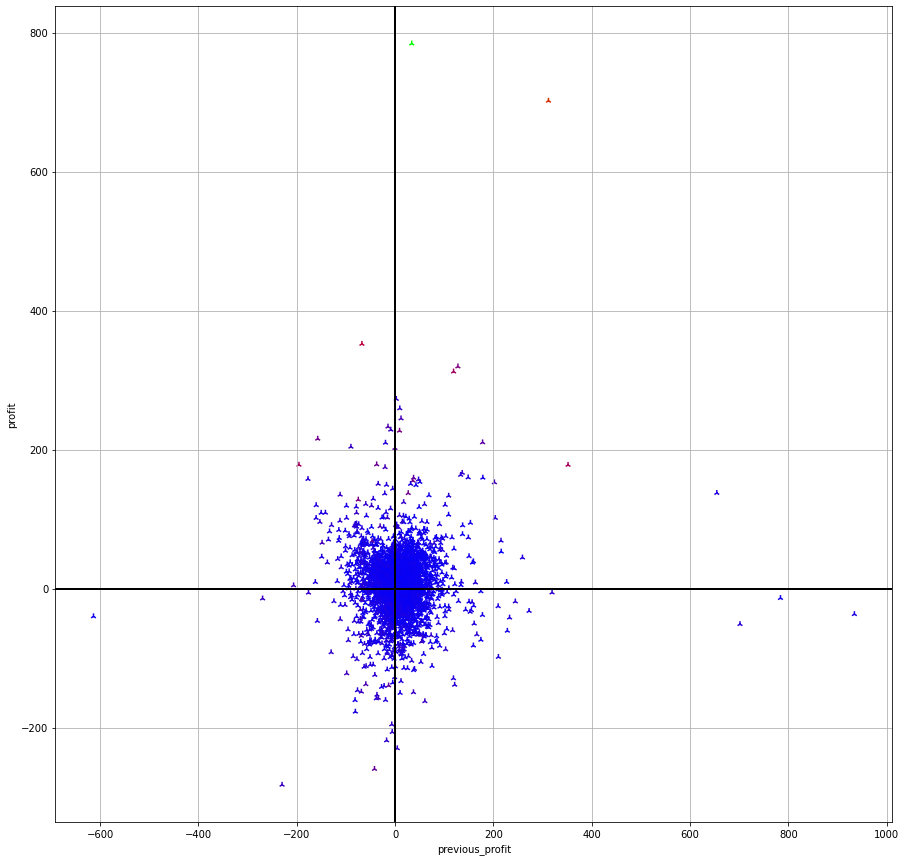

In [8]:
plt.rcParams["figure.figsize"] = (15, 15)

fig, ax = plt.subplots()
ax.scatter(x=df['previous_profit'], y=df['profit'], marker='2', c=df.volatility, cmap='brg')
ax.set_xlabel('previous_profit')
ax.set_ylabel('profit')
ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)

plt.grid()
plt.show()

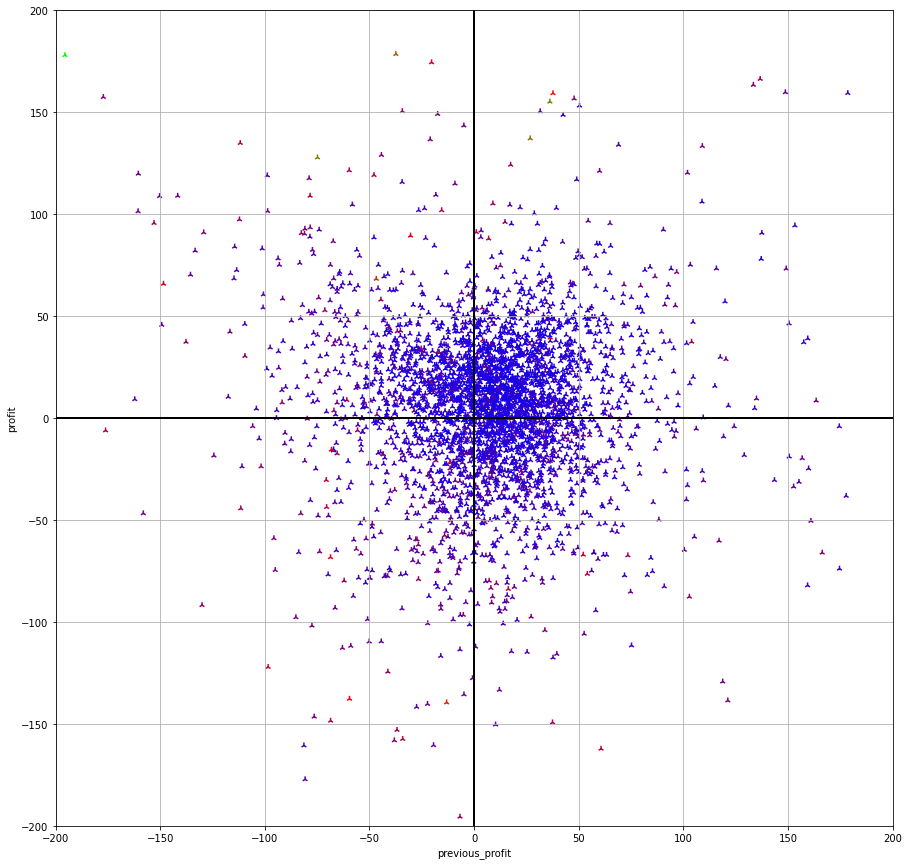

In [9]:
limit1 = 200
df1 = df.drop(df[(df.profit < -limit1) | (df.profit > limit1) | (df.previous_profit < -limit1) | (df.previous_profit > limit1)].index)

plt.rcParams["figure.figsize"] = (15, 15)

fig, ax = plt.subplots()
ax.scatter(x=df1['previous_profit'], y=df1['profit'], marker='2', c=df1.volatility, cmap='brg')
ax.set_xlabel('previous_profit')
ax.set_ylabel('profit')
ax.axhline(0, color='black', linewidth=2)
ax.axvline(0, color='black', linewidth=2)

plt.xlim([-limit1, limit1])
plt.ylim([-limit1, limit1])
plt.grid()
plt.show()